In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED=42
LABELS=["Normal","Fraud"]

C:\Users\sonih\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\sonih\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
credit=pd.read_csv("E:\\itsstudytym\\assignments\\DT\\Fraud_check.csv")

In [3]:
credit.head(10)

,Undergrad,Marital.Status,Taxable_Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [4]:
credit.shape

(600, 6)

In [5]:
for i in range(0,len(credit['Taxable_Income'])):
    if credit['Taxable_Income'][i] <= 30000:
        credit['Taxable_Income'][i]=0
    else:
        credit['Taxable_Income'][i]=1

C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\sonih\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
credit.head(10)

,Undergrad,Marital.Status,Taxable_Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
5,NO,Divorced,1,116382,0,NO
6,NO,Divorced,1,80890,8,YES
7,YES,Single,1,131253,3,YES
8,NO,Single,1,102481,12,YES
9,YES,Divorced,1,155482,4,YES


In [7]:
credit['Undergrad']=pd.get_dummies(credit['Undergrad'],drop_first=True)
credit['Urban']=pd.get_dummies(credit['Urban'],drop_first=True)

In [8]:
Marital_Status=pd.get_dummies(credit['Marital.Status'],drop_first=True)

In [9]:
credit=credit.drop('Marital.Status',axis=1)

In [10]:
credit=pd.concat([credit,Marital_Status],axis=1)

In [11]:
credit.head()

,Undergrad,Taxable_Income,City.Population,Work.Experience,Urban,Married,Single
0,0,1,50047,10,1,0,1
1,1,1,134075,18,1,0,0
2,0,1,160205,30,1,1,0
3,1,1,193264,15,1,0,1
4,0,1,27533,28,0,1,0


In [12]:
cols=credit.columns.tolist()

In [13]:
cols=[c for c in cols if c not in ["Taxable_Income"]]

In [14]:
target="Taxable_Income"

In [15]:
state=np.random.RandomState(42)
X=credit[cols]
y=credit[target]
X_outliers=state.uniform(low=0,high=1,size=(X.shape[0],X.shape[1]))
print(X.shape)
y.shape

(600, 6)


(600,)

## EDA

In [16]:
credit.isnull().sum()

Undergrad          0
Taxable_Income     0
City.Population    0
Work.Experience    0
Urban              0
Married            0
Single             0
dtype: int64

Text(0, 0.5, 'Frequency')

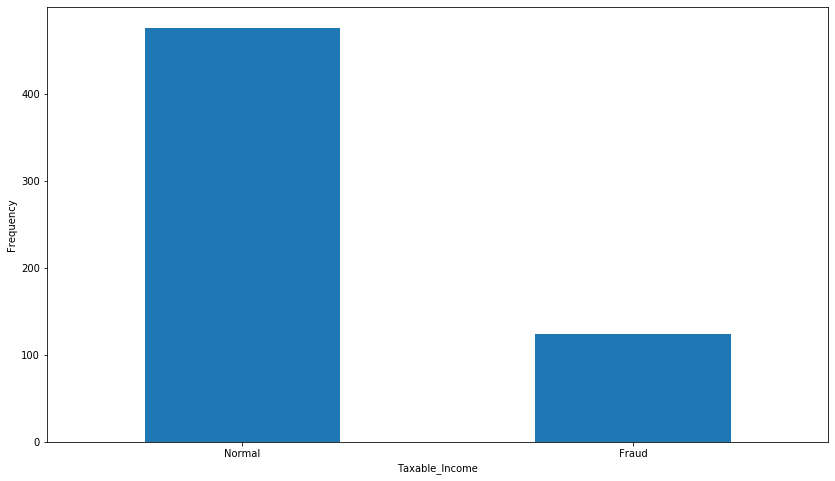

In [17]:
count=pd.value_counts(credit['Taxable_Income'],sort=True)
count.plot(kind='bar',rot=0)
plt.title("")
plt.xticks(range(2),LABELS)
plt.xlabel('Taxable_Income')
plt.ylabel('Frequency')

In [18]:
fraud=credit[credit['Taxable_Income']==0]
normal=credit[credit['Taxable_Income']==1]

In [19]:
print(fraud.shape,normal.shape)

(124, 7) (476, 7)


In [25]:
from imblearn.under_sampling import NearMiss
nm=NearMiss(version=1)
X_res,y_res=nm.fit_sample(X,y)

In [26]:
X_res.shape,y_res.shape

((248, 6), (248,))

In [41]:
from collections import Counter
print(Counter(y))
print(Counter(y_res))
print(Counter(X))
print(Counter(X_res))
y_res

Counter({1: 476, 0: 124})
Counter({0: 124, 1: 124})
Counter({'Undergrad': 1, 'City.Population': 1, 'Work.Experience': 1, 'Urban': 1, 'Married': 1, 'Single': 1})
Counter({'Undergrad': 1, 'City.Population': 1, 'Work.Experience': 1, 'Urban': 1, 'Married': 1, 'Single': 1})


0      0
1      0
2      0
3      0
4      0
      ..
243    1
244    1
245    1
246    1
247    1
Name: Taxable_Income, Length: 248, dtype: int64

In [37]:
from sklearn import tree

In [38]:
DT=tree.DecisionTreeClassifier()

In [39]:
from sklearn.model_selection import cross_val_score

In [44]:
cvs=cross_val_score(DT,X_res,y_res,cv=5)

In [46]:
cvs.mean()

0.42367346938775513